The <b>mean squared error</b> has increased. So this shows that a single feature is not a good predictor of housing prices.

** To-Do 1: Make a train-test split and calculate the mean squared error for training data and test data.**

** To-Do 2: Plot the residuals for training and test datasets**

**In the next section, we are going to read in a feather file and assemble the dataset in one Pandas dataframe that 
we can work with.**
Refer to the "explore_questionnaire.pdf" in the folder for detailed explanation of the dataset.

<img src="./w56.png"/>

To install and run feather use:

**pip install feather-format** -- or else, (if you get import error) **pip install feather-format**

# Open in Pickle

In [141]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

In [142]:
def Open_Pickle(dataframe):
    with open (dataframe, 'rb') as f:
        return pickle.load(f)
    
    
anp_df = Open_Pickle('data_science_case/anp.pkl')
face_df = Open_Pickle('data_science_case/face.pkl')
image_df = Open_Pickle('data_science_case/image_data.pkl')
metrics_df = Open_Pickle('data_science_case/image_metrics.pkl')
object_labels_df = Open_Pickle('data_science_case/object_labels.pkl')
survey_df = Open_Pickle('data_science_case/survey.pkl')


In [143]:
#Drop unnecessary columns in image_df dataframework
image_df.head()
drop = ['image_link','image_url','image_posted_time_unix','user_full_name',\
        'user_name','user_website','user_profile_pic','user_bio']

image_df =  image_df.drop(drop,axis=1)
image_df.head()

,image_id,image_height,image_width,image_filter,image_posted_time,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos
0,1316962883971761394_3468175004,640.0,640.0,Lo-fi,14-08-2016 22:37:11,0.800521,3468175004,7.0,0.0,1.0
1,552382455733335946_263042348,612.0,612.0,Normal,25-09-2013 00:32:21,0.875568,263042348,316.0,347.0,73.0
2,594552614686078174_263042348,640.0,640.0,Vesper,22-11-2013 04:56:56,0.672679,263042348,316.0,347.0,73.0
3,553884883234370621_263042348,640.0,640.0,Amaro,27-09-2013 02:17:25,0.843525,263042348,316.0,347.0,73.0
4,725551583154452417_263042348,640.0,640.0,Amaro,21-05-2014 22:48:30,0.859796,263042348,316.0,347.0,73.0


In [144]:
#Drop unnecessary columns in metrics_df dataframework
metrics_df.head()
drop = ['comment_count_time_created','like_count_time_created']
metrics_df =  metrics_df.drop(drop,axis=1)
metrics_df.head()

,image_id,comment_count,like_count
0,1337283311810249709_3041716852,0.0,15.0
1,1337283311810249709_3041716852,0.0,15.0
2,1337834353379743556_3041716852,0.0,23.0
3,1337834353379743556_3041716852,0.0,23.0
4,1516356155708878303_3041716852,5.0,19.0


In [145]:
print 'The survey started at: '+str(survey_df['start_q'].min())
print 'The survey ended at: '+str(survey_df['end_q'].max())+'\n\n'
survey_df['start_q'] = pd.to_datetime(survey_df['start_q'], format = '%Y-%m-%d %H:%M:%S')
survey_df['end_q'] = pd.to_datetime(survey_df['end_q'], format = '%Y-%m-%d %H:%M:%S')
start_survey =survey_df['start_q'].min()
end_survey = survey_df['end_q'].max()
drop = ['participate','completed','start_q','end_q','network_id','private_account']
survey_df =  survey_df.drop(drop,axis=1)
survey_df.head()

The survey started at: 2016-12-05 14:01:21
The survey ended at: 2017-03-23 15:16:17




,id,gender,born,education,employed,income,A_2,N_1,P_1,E_1,...,insta_user_id,P,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount
0,920bf027f7d13dbdc7b66b3d3324903c,Male,1975,College graduate,Employed for wages,"$30,000 to $39,999",4,5,5,3,...,6.198686e+08,5,3.0,6.0,6.0,4.0,5,5.0,5,465.0
1,b433b2bfe49e28d0b7c45925b53084e0,Male,1978,College graduate,Employed for wages,"$20,000 to $29,999",8,0,9,7,...,1.879203e+08,9,7.0,9.0,8.0,7.0,9,0.0,9,6.0
2,4becd8768d42ffa6ef0a17d827f230a2,Male,1980,High school graduate,Self-employed,"$40,000 to $49,999",7,7,6,9,...,5.133243e+08,6,9.0,6.0,6.0,8.0,6,7.0,6,NaN
3,01d90eeb34866d03c52925738da7865f,Male,1959,College graduate,Employed for wages,"$10,000 to $19,999",6,4,1,5,...,3.437021e+09,1,5.0,3.0,3.0,3.0,1,4.0,1,NaN
4,f4f54676f75f47c17dc434cf68845328,Female,1990,High school graduate,Employed for wages,"$80,000 to $89,999",7,3,8,7,...,3.342091e+07,8,7.0,8.0,8.0,7.0,8,3.0,8,767.0


In [146]:
# Merge them based on the image_id so that we have a large data frame containing all the elements

image_anp_frame = pd.merge(image_df, anp_df, how='inner', on='image_id')
im_anp_obj_frame = pd.merge(image_anp_frame, object_labels_df, how='inner', on='image_id')
im_anp_obj_face_frame = pd.merge(im_anp_obj_frame, face_df, how='inner', on='image_id')

In [147]:
im_anp_obj_face_frame.shape

(3887625, 32)

In [148]:
print 'The number of unique users who took the Survey is: '+str(len(survey_df['insta_user_id'].unique()))
print 'The number of unique users in  the image data-set is: '+str(len(im_anp_obj_face_frame['user_id'].unique()))

The number of unique users who took the Survey is: 329
The number of unique users in  the image data-set is: 144


In [160]:
im_anp_obj_face_frame['user_id'] = im_anp_obj_face_frame['user_id'].apply(lambda x : int(x))

In [161]:
#convert all the image_posted_time strings to datime object for tracking the year of creation
im_anp_obj_face_frame['image_posted_time'] = pd.to_datetime(im_anp_obj_face_frame['image_posted_time'], format = '%d-%m-%Y %H:%M:%S' )

In [162]:
print start_survey
print end_survey 

2016-12-05 14:01:21
2017-03-23 15:16:17


In [163]:
from dateutil.relativedelta import relativedelta
import datetime

def change_time_intervals(time,  num_months):
    three_mon_rel = relativedelta(months=num_months)
    return time +three_mon_rel

#test the function
change_time_intervals(end_survey,-3)

Timestamp('2016-12-23 15:16:17')

In [164]:
last_years_images = im_anp_obj_face_frame[(im_anp_obj_face_frame.image_posted_time>=change_time_intervals(start_survey,-3)) & (im_anp_obj_face_frame.image_posted_time<=change_time_intervals(end_survey,3) )]
print 'The last year dataframe has '+ str(len(last_years_images['user_id'].unique()))+' users.'
print last_years_images.shape

The last year dataframe has 109 users.
(598269, 32)


In [165]:
#merge the image dataframe with the survey dataframe 
image_survey = pd.merge(last_years_images,survey_df,left_on='user_id',right_on = 'insta_user_id')
print image_survey.shape
print 'The merging dataframe has '+ str(len(image_survey['user_id'].unique()))+' users.'

(622593, 71)
The merging dataframe has 109 users.


# Further Pre-Processing

In [166]:
image_survey = image_survey.dropna()
print image_survey.shape
print 'The merging dataframe has '+ str(len(image_survey['user_id'].unique()))+' users.'

(619803, 71)
The merging dataframe has 108 users.


In [167]:
#drop duplicates
image_survey = image_survey.drop_duplicates()
print image_survey.shape
print 'The merging dataframe has '+ str(len(image_survey['user_id'].unique()))+' users.'

(504006, 71)
The merging dataframe has 108 users.


In [168]:
image_survey.sample(5)

,image_id,image_height,image_width,image_filter,image_posted_time,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos,...,insta_user_id,P,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount
255295,1515009048679265245_1804133497,640.0,640.0,Normal,2017-05-15 04:39:34,0.845981,1804133497,126.0,210.0,60.0,...,1.804133e+09,8,9.0,4.0,7.0,10.0,8,6.0,8,52.0
210344,1336285833942472842_50853245,640.0,640.0,Normal,2016-09-10 14:28:26,0.806739,50853245,328.0,885.0,653.0,...,5.085324e+07,5,6.0,7.0,7.0,7.0,5,4.0,5,642.0
123662,1536656600181750732_235671446,640.0,640.0,Normal,2017-06-14 01:29:23,0.820036,235671446,1318.0,936.0,2997.0,...,2.356714e+08,6,5.0,5.0,6.0,6.0,6,4.0,6,1545.0
444101,1444029454622968413_1600397470,800.0,640.0,Amaro,2017-02-06 06:15:47,0.890093,1600397470,469.0,125.0,448.0,...,1.600397e+09,9,8.0,8.0,10.0,10.0,9,8.0,9,447.0
475641,1449542066697887528_30837828,640.0,640.0,Normal,2017-02-13 20:48:21,0.869582,30837828,1617.0,1459.0,552.0,...,3.083783e+07,8,8.0,8.0,8.0,6.0,8,4.0,8,548.0


In [169]:
#Merge Big dataframe to metrics

image_survey_metrics = pd.merge(image_survey, metrics_df, how='inner', on='image_id')
image_survey_metrics = image_survey_metrics.dropna()
print 'The number of unique users in dataframe is: '+str(len(image_survey_metrics['user_id'].unique()))

The number of unique users in dataframe is: 107


In [173]:
import pickle
with open ('image_survey_metrics.pickle','wb') as f:
    pickle.dump(image_survey_metrics,f)

In [172]:
image_survey_metrics.shape

(513714, 73)

In [180]:
image_survey_metrics.loc[image_survey_metrics['image_id']== '1372870097060159201_53918317']

,image_id,image_height,image_width,image_filter,image_posted_time,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos,...,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount,comment_count,like_count
0,1372870097060159201_53918317,640.0,640.0,Normal,2016-10-31 01:54:50,0.746274,53918317,100.0,174.0,105.0,...,7.0,8.0,5.0,5.0,1,8.0,1,105.0,0.0,3.0
1,1372870097060159201_53918317,640.0,640.0,Normal,2016-10-31 01:54:50,0.746274,53918317,100.0,174.0,105.0,...,7.0,8.0,5.0,5.0,1,8.0,1,105.0,0.0,3.0
2,1372870097060159201_53918317,640.0,640.0,Normal,2016-10-31 01:54:50,0.746274,53918317,100.0,174.0,105.0,...,7.0,8.0,5.0,5.0,1,8.0,1,105.0,0.0,3.0
3,1372870097060159201_53918317,640.0,640.0,Normal,2016-10-31 01:54:50,0.746274,53918317,100.0,174.0,105.0,...,7.0,8.0,5.0,5.0,1,8.0,1,105.0,0.0,3.0
4,1372870097060159201_53918317,640.0,640.0,Normal,2016-10-31 01:54:50,0.746274,53918317,100.0,174.0,105.0,...,7.0,8.0,5.0,5.0,1,8.0,1,105.0,0.0,3.0
5,1372870097060159201_53918317,640.0,640.0,Normal,2016-10-31 01:54:50,0.746274,53918317,100.0,174.0,105.0,...,7.0,8.0,5.0,5.0,1,8.0,1,105.0,0.0,3.0
6,1372870097060159201_53918317,640.0,640.0,Normal,2016-10-31 01:54:50,0.746274,53918317,100.0,174.0,105.0,...,7.0,8.0,5.0,5.0,1,8.0,1,105.0,0.0,3.0
7,1372870097060159201_53918317,640.0,640.0,Normal,2016-10-31 01:54:50,0.746274,53918317,100.0,174.0,105.0,...,7.0,8.0,5.0,5.0,1,8.0,1,105.0,0.0,3.0
8,1372870097060159201_53918317,640.0,640.0,Normal,2016-10-31 01:54:50,0.746274,53918317,100.0,174.0,105.0,...,7.0,8.0,5.0,5.0,1,8.0,1,105.0,0.0,3.0
9,1372870097060159201_53918317,640.0,640.0,Normal,2016-10-31 01:54:50,0.746274,53918317,100.0,174.0,105.0,...,7.0,8.0,5.0,5.0,1,8.0,1,105.0,0.0,3.0


In [28]:
image_survey_metrics.sample(5)

,image_id,image_height,image_width,image_filter,image_posted_time,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos,...,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount,comment_count,like_count
114058,1413138434008848634_372088523,640.0,640.0,Normal,2016-12-25 15:20:50,0.908184,372088523.0,997.0,816.0,1312.0,...,7.0,7.0,6.0,5.0,6,6.0,6,1292.0,2.0,56.0
87239,1434357389229903099_30837828,640.0,640.0,X-Pro II,2017-01-23 21:59:07,0.921235,30837828.0,1617.0,1459.0,552.0,...,8.0,8.0,8.0,6.0,8,4.0,8,548.0,0.0,59.0
60238,1449078716675936092_452851338,567.0,640.0,Normal,2017-02-13 05:27:46,0.812354,452851338.0,287.0,611.0,1207.0,...,8.0,9.0,7.0,6.0,6,7.0,6,1199.0,0.0,35.0
16653,1416459515021119064_235671446,640.0,640.0,Normal,2016-12-30 05:19:14,0.780975,235671446.0,1318.0,936.0,2997.0,...,5.0,5.0,6.0,6.0,6,4.0,6,1545.0,0.0,7.0
35457,1412404458868123480_30738858,640.0,640.0,Normal,2016-12-24 15:02:33,0.862715,30738858.0,244.0,522.0,568.0,...,8.0,7.0,5.0,4.0,6,6.0,6,567.0,1.0,8.0


In [79]:
image_survey_metrics.loc[image_survey['user_id']== -2147483648]

,image_id,image_height,image_width,image_filter,image_posted_time,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos,...,insta_user_id,P,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount


# Object_Label Analysis

In [176]:
#isolating the object_label attributes from the main table
survey_objects_df = pd.DataFrame
survey_objects_df = image_survey_metrics[['image_id', 'user_id','data_amz_label','data_amz_label_confidence','PERMA']]
print survey_objects_df.shape
print 'The merging dataframe has '+ str(len(survey_objects_df['user_id'].unique()))+' users.'

(513714, 5)
The merging dataframe has 107 users.


In [177]:
survey_objects_df

,image_id,user_id,data_amz_label,data_amz_label_confidence,PERMA
0,1372870097060159201_53918317,53918317,Human,99.085220,1
1,1372870097060159201_53918317,53918317,Human,99.085220,1
2,1372870097060159201_53918317,53918317,Human,99.085220,1
3,1372870097060159201_53918317,53918317,People,99.108864,1
4,1372870097060159201_53918317,53918317,People,99.108864,1
5,1372870097060159201_53918317,53918317,People,99.108864,1
6,1372870097060159201_53918317,53918317,Person,99.108871,1
7,1372870097060159201_53918317,53918317,Person,99.108871,1
8,1372870097060159201_53918317,53918317,Person,99.108871,1
9,1372870097060159201_53918317,53918317,Human,99.085220,1


In [181]:
#Remove duplicates
survey_objects_unique = survey_objects_df.drop_duplicates()
print survey_objects_unique.shape
print 'The merging dataframe has '+ str(len(survey_objects_unique['user_id'].unique()))+' users.'

(15412, 5)
The merging dataframe has 107 users.


In [183]:
survey_objects_unique.loc[(survey_objects_unique['user_id']== 11520833.0) & (survey_objects_unique['data_amz_label']== "Human")] 

,image_id,user_id,data_amz_label,data_amz_label_confidence,PERMA
1275,1513327950253125779_11520833,11520833,Human,99.324883,7
1425,1433747939066620854_11520833,11520833,Human,99.265114,7
1800,1388717914416470746_11520833,11520833,Human,99.207436,7
1950,1493013377612710198_11520833,11520833,Human,99.269310,7
2055,1497342449834718778_11520833,11520833,Human,99.253067,7
2145,1361263217594182394_11520833,11520833,Human,99.283134,7
2250,1367127187588778043_11520833,11520833,Human,98.687294,7
2592,1346146220674663590_11520833,11520833,Human,99.238541,7


# Create User-Object-Confidence

In [205]:
#User-Object-Confidence dataframe
user_objectConf_df = pd.DataFrame({'Average_Confidence' : survey_objects_unique.groupby( [ "user_id", "data_amz_label","PERMA"] ).data_amz_label_confidence.mean()}).reset_index()
print user_objectConf_df.shape
print 'The dataframe has '+ str(len(user_objectConf_df['user_id'].unique()))+' users.'

(4423, 4)
The dataframe has 107 users.


In [245]:
Obj_labels = list(user_objectConf_df['data_amz_label'].unique())
len(Obj_labels)

819

In [243]:
objLabels_dict = {}
lkp = 0
for i in range(len(Obj_labels)):
    lkp = lkp+1
    objLabels_dict[Obj_labels[i]] = lkp

In [244]:
objLabels_dict

{u'Abyssinian': 610,
 u'Accessories': 1,
 u'Accordion': 791,
 u'Adorable': 463,
 u'Adventure': 531,
 u'Affenpinscher': 550,
 u'Afro Hairstyle': 270,
 u'Agaric': 371,
 u'Alcohol': 58,
 u'Algae': 809,
 u'Alpaca': 318,
 u'Alphabet': 792,
 u'Alps': 319,
 u'Altar': 810,
 u'Amanita': 372,
 u'Amaryllis': 642,
 u'American Football': 756,
 u'Amethyst': 398,
 u'Amplifier': 485,
 u'Analog Clock': 150,
 u'Ancient Egypt': 574,
 u'Animal': 59,
 u'Ankle': 738,
 u'Apparel': 2,
 u'Apple': 685,
 u'Appliance': 151,
 u'Applique': 399,
 u'Apron': 347,
 u'Aquarium': 100,
 u'Aquatic': 101,
 u'Architecture': 210,
 u'Arena': 262,
 u'Arm': 278,
 u'Armor': 681,
 u'Army': 410,
 u'Art': 102,
 u'Asleep': 152,
 u'Asparagus': 320,
 u'Asphalt': 686,
 u'Assembly Line': 623,
 u'Astronaut': 643,
 u'Astronomy': 279,
 u'Athlete': 280,
 u'Atm': 486,
 u'Audience': 624,
 u'Auditorium': 625,
 u'Autograph': 197,
 u'Automobile': 251,
 u'Avocado': 321,
 u'Azure Sky': 766,
 u'Baby': 153,
 u'Back': 580,
 u'Backyard': 103,
 u'Badge'

In [246]:
# Converting the categorical variable in to a integer column
user_objectConf_df['obj_label_ref'] = user_objectConf_df['data_amz_label'].map(objLabels_dict)

In [304]:
user_HighConf_df = user_objectConf_df.loc[user_objectConf_df['Average_Confidence'] >= 75]
print user_HighConf_df.shape
print 'The dataframe has '+ str(len(user_HighConf_df['user_id'].unique()))+' users.'

(3861, 5)
The dataframe has 107 users.


In [294]:
user_objectConf_df

,user_id,data_amz_label,PERMA,Average_Confidence,obj_label_ref
0,1.619510e+06,Accessories,4,87.641968,1
1,1.619510e+06,Apparel,4,72.298630,2
2,1.619510e+06,Beard,4,73.133087,3
3,1.619510e+06,Bowl,4,90.927696,4
4,1.619510e+06,Braid,4,95.455473,5
5,1.619510e+06,Brochure,4,80.054337,6
6,1.619510e+06,Business Card,4,95.665573,7
7,1.619510e+06,Clothing,4,90.305344,8
8,1.619510e+06,Coffee Cup,4,78.394615,9
9,1.619510e+06,Collage,4,90.772324,10


In [208]:
user_objectConf_df.loc[user_objectConf_df['user_id']== 11520833 ] 

,user_id,data_amz_label,PERMA,Average_Confidence
282,11520833,Animal,7,95.546654
283,11520833,Autograph,7,89.035721
284,11520833,Bird,7,96.196510
285,11520833,Bison,7,95.546654
286,11520833,Brochure,7,74.845612
287,11520833,Bull,7,95.546654
288,11520833,Clothing,7,93.994019
289,11520833,Cosmos,7,70.734550
290,11520833,Crowd,7,72.590042
291,11520833,Dirt Road,7,92.959068


In [193]:
import pickle
with open ('User_Obj_Confidence.pickle','wb') as f:
    pickle.dump(user_objectConf_df,f)
    

In [252]:
user_objectConf_df['user_id'] = user_objectConf_df['user_id'].apply(lambda x : float(x))
user_objectConf_df.dtypes
print user_objectConf_df.shape
print 'The dataframe has '+ str(len(user_objectConf_df['user_id'].unique()))+' users.'

(4423, 5)
The dataframe has 107 users.


# Object-PERMA Analysis

In [253]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [268]:
# Calculate the correlation coefficients. Notice how the main diagonal is 1.00
correlation_matrix = user_objectConf_df.corr()
correlation_matrix


,user_id,PERMA,Average_Confidence,obj_label_ref
user_id,1.000000,-0.074230,0.009964,0.14119
PERMA,-0.074230,1.000000,-0.006497,-0.00422
Average_Confidence,0.009964,-0.006497,1.000000,-0.14604
obj_label_ref,0.141190,-0.004220,-0.146040,1.00000


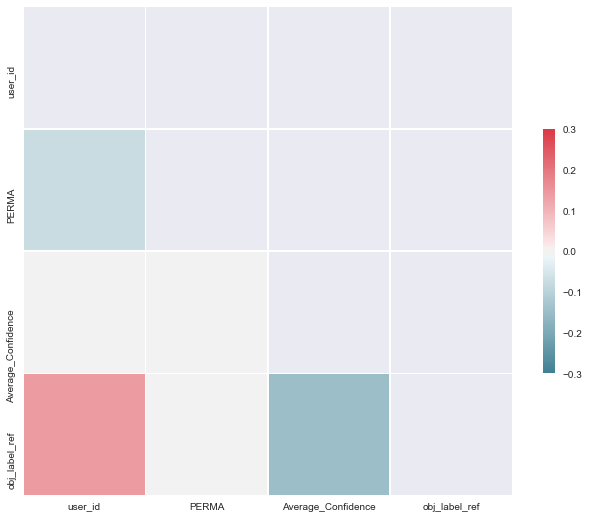

In [255]:
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [274]:
from sklearn.cross_validation import train_test_split

#independent_variables = user_objectConf_df[list(correlation_matrix)]
#dependent_variables = user_objectConf_df['PERMA']

train,  test = train_test_split(user_objectConf_df,test_size=0.2)
print train.shape

(3538, 5)


In [282]:
x_train = train.drop('PERMA',axis =1)
x_test = test.drop('PERMA',axis =1)

y_train = train['PERMA']
y_test = test['PERMA']
y_train.shape 


(3538L,)

In [217]:
# from sklearn.linear_model import LinearRegression
# import time

# start = time.time()
# #This creates a LinearRegression object
# lm = LinearRegression()
# # Train the model using the training sets
# lm.fit(x_train, y_train)

# end = time.time()
# print(end - start)


0.0350000858307


In [219]:
# # Make predictions using the testing set
# insta_y_pred = lm.predict(x_test)

In [220]:
# from sklearn.metrics import mean_squared_error, r2_score

# # The coefficients
# print('Coefficients: \n', lm.coef_)
# # The mean squared error
# print("Mean squared error: %.2f"% mean_squared_error(y_test, insta_y_pred))
# # Explained variance score: 1 is perfect prediction
# print('Variance score: %.2f' % r2_score(y_test, insta_y_pred))

('Coefficients: \n', array([  1.00000000e+00,  -1.67090700e-18]))
Mean squared error: 0.00
Variance score: 1.00


# Linear Modelling - Stats Model

In [283]:
import statsmodels.formula.api as smf

#REFERENCE---->http://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/
columns =list(x_train)


In [284]:
value ='PERMA~'+ '+'.join(columns)

print value

PERMA~user_id+data_amz_label+Average_Confidence+obj_label_ref


In [285]:
### STATSMODELS ###

# create a fitted model with all three features
lm1 = smf.ols(formula=value, data=user_objectConf_df).fit()

# print the coefficients
lm1.params

Intercept                                7.112364e+00
data_amz_label[T.Accessories]           -7.714681e-01
data_amz_label[T.Accordion]              2.203082e-02
data_amz_label[T.Adorable]              -1.330441e-02
data_amz_label[T.Adventure]              1.245719e+00
data_amz_label[T.Affenpinscher]          3.048534e-01
data_amz_label[T.Afro Hairstyle]         1.872837e-01
data_amz_label[T.Agaric]                 1.909369e+00
data_amz_label[T.Alcohol]                4.752200e-01
data_amz_label[T.Algae]                  7.345823e-02
data_amz_label[T.Alpaca]                 7.915659e-01
data_amz_label[T.Alphabet]               8.871869e-04
data_amz_label[T.Alps]                   2.374720e+00
data_amz_label[T.Altar]                  2.087014e+00
data_amz_label[T.Amanita]                1.911549e+00
data_amz_label[T.Amaryllis]              4.855682e-01
data_amz_label[T.American Football]      8.958736e-01
data_amz_label[T.Amethyst]               9.195282e-01
data_amz_label[T.Amplifier] 

In [286]:
### STATSMODELS ###

# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PERMA   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                 -0.031
Method:                 Least Squares   F-statistic:                    0.8354
Date:                Wed, 18 Oct 2017   Prob (F-statistic):              0.999
Time:                        11:34:42   Log-Likelihood:                -7984.6
No. Observations:                4423   AIC:                         1.761e+04
Df Residuals:                    3602   BIC:                         2.286e+04
Df Model:                         820                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 7.1124      0.456     15.613      0.000       6.219       8.005
data_amz_label[T.Accessories]            -0.7715      0.691     -1.116      0.265      -2.127       0.584
data_amz_label[T.Accordion]               0.0220      2.277      0.010      0.992      -4.442       4.486
data_amz_label[T.Adorable]               -0.0133      1.010     -0.013      0.989      -1.993       1.967
data_amz_label[T.Adventure]               1.2457      1.894      0.658      0.511      -2.468       4.960
data_amz_label[T.Affenpinscher]           0.3049      1.918      0.159      0.874      -3.457       4.066
data_amz_label[T.Afro Hairstyle]          0.1873      0.640      0.293      0.770      -1.067       1.442
data_amz_label[T.Agaric]                  1.9094      1.290      1.480      0.139      -0.620       4.439
data_amz_label[T.Alcohol]                 0.4752      0.392      1.212      0.225      -0.293       1.244
data_amz_label[T.Algae]                   0.0735      2.306      0.032      0.975      -4.448       4.595
data_amz_label[T.Alpaca]                  0.7916      1.238      0.639      0.523      -1.636       3.219
data_amz_label[T.Alphabet]                0.0009      2.278      0.000      1.000      -4.465       4.467
data_amz_label[T.Alps]                    2.3747      1.239      1.916      0.055      -0.055       4.804
data_amz_label[T.Altar]                   2.0870      2.308      0.904      0.366      -2.438       6.612
data_amz_label[T.Amanita]                 1.9115      1.291      1.480      0.139      -0.620       4.443
data_amz_label[T.Amaryllis]               0.4856      2.043      0.238      0.812      -3.520       4.491
data_amz_label[T.American Football]       0.8959      2.219      0.404      0.686      -3.455       5.247
data_amz_label[T.Amethyst]                0.9195      1.753      0.525      0.600      -2.517       4.356
data_amz_label[T.Amplifier]               0.1422      1.840      0.077      0.938      -3.466       3.750
data_amz_label[T.Analog Clock]           -0.3236      0.816     -0.396      0.692      -1.924       1.277
data_amz_label[T.Ancient Egypt]           2.3350      1.949      1.198      0.231      -1.486       6.156
data_amz_label[T.Animal]                 -0.2801      0.348     -0.806      0.420      -0.962       0.401
data_amz_label[T.Ankle]                   0.7776      2.189      0.355      0.722      -3.514       5.069
data_amz_label[T.Apparel]                -0.6499      0.475     -1.367      0.172      -1.582       0.282
data_amz_label[T.Apple]                   2.1097      1.763      1.197      0.232      -1.347       5.566
data_amz_label[T.Appliance]               0.1113      0.496      0.225      0.822      -0.861       1.083
data_amz_

In [287]:
# calculate r-square 
lm1.rsquared

0.15978753525181122

In [290]:
y_predict = lm1.predict(x_test)
y_predict

4016     6.330339
2944     5.000000
2831     6.516334
3097     6.927757
2391     6.000001
263      6.514222
2516     6.737164
2715     6.073733
2167     6.527059
3530     6.650552
718      6.555054
478      6.368966
2700     6.514513
1924     6.695449
1743     6.343036
1618     6.895274
689      7.368346
1330     6.559960
18       5.551576
3046     6.809368
1667     5.487768
3660     6.404711
4352     6.248312
3484     4.000000
3280     6.349897
233      6.919643
4262     7.898753
163      6.526223
3405     6.442639
108      6.642874
2049     6.508321
1605     6.733429
3829     6.183045
54       6.324961
2297     6.505821
391      6.525459
1147     6.698622
871      6.882907
3853     6.839721
1391     6.402492
3793     4.516045
2863     6.504809
2114     7.648941
1538     6.525244
1223     6.404929
3844     5.299032
4089     5.964946
3567     6.019208
1252     6.358306
296      6.525976
1363     6.314110
2528     7.417063
3256     6.701875
2337     6.672216
2923     6.693240
1516     5

In [293]:
residuals = y_test - insta_y_pred
residuals

4016    4.000000e+00
2944   -8.881784e-16
2831    5.000000e+00
3097    1.000000e+00
2391    2.000000e+00
263    -1.000000e+00
2516    0.000000e+00
2715   -1.000000e+00
2167    8.881784e-16
3530   -1.000000e+00
718    -1.000000e+00
478     0.000000e+00
2700   -1.000000e+00
1924    0.000000e+00
1743    3.000000e+00
1618    0.000000e+00
689     1.000000e+00
1330   -2.000000e+00
18     -2.000000e+00
3046    4.000000e+00
1667   -1.000000e+00
3660    0.000000e+00
4352   -3.000000e+00
3484   -2.000000e+00
3280    1.000000e+00
233     8.881784e-16
4262    3.000000e+00
163    -4.000000e+00
3405    1.000000e+00
108     0.000000e+00
2049    0.000000e+00
1605    0.000000e+00
3829    3.000000e+00
54      2.000000e+00
2297    1.000000e+00
391    -1.000000e+00
1147    8.881784e-16
871    -1.000000e+00
3853   -3.000000e+00
1391    0.000000e+00
3793   -5.000000e+00
2863    4.000000e+00
2114    8.881784e-16
1538    0.000000e+00
1223   -1.000000e+00
3844   -6.000000e+00
4089    3.000000e+00
3567   -4.000

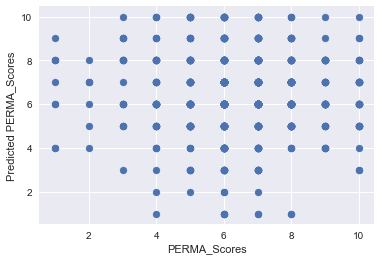

In [292]:
#PERMA Scores are from  1-10

plt.scatter(y_test, insta_y_pred)
plt.xlabel("PERMA_Scores")
plt.ylabel("Predicted PERMA_Scores")
plt.title("")
plt.show()

# Create User-Metrics

In [233]:
list(metrics_df)

[u'image_id', u'comment_count', u'like_count']

In [234]:
#isolating the image_metrics attributes from the main table
survey_metrics_df = pd.DataFrame
survey_metrics_df = image_survey_metrics[['image_id', 'user_id','comment_count','like_count','PERMA']]
print survey_metrics_df.shape
print 'The merging dataframe has '+ str(len(survey_metrics_df['user_id'].unique()))+' users.'

(513714, 5)
The merging dataframe has 107 users.


In [235]:
survey_metrics_df

,image_id,user_id,comment_count,like_count,PERMA
0,1372870097060159201_53918317,53918317,0.0,3.0,1
1,1372870097060159201_53918317,53918317,0.0,3.0,1
2,1372870097060159201_53918317,53918317,0.0,3.0,1
3,1372870097060159201_53918317,53918317,0.0,3.0,1
4,1372870097060159201_53918317,53918317,0.0,3.0,1
5,1372870097060159201_53918317,53918317,0.0,3.0,1
6,1372870097060159201_53918317,53918317,0.0,3.0,1
7,1372870097060159201_53918317,53918317,0.0,3.0,1
8,1372870097060159201_53918317,53918317,0.0,3.0,1
9,1372870097060159201_53918317,53918317,0.0,3.0,1


In [238]:
#Remove duplicates
survey_metrics_unique = survey_metrics_df.drop_duplicates()
print survey_metrics_unique.shape
print 'The merging dataframe has '+ str(len(survey_metrics_unique['user_id'].unique()))+' users.'

(2776, 5)
The merging dataframe has 107 users.


In [239]:
survey_metrics_unique

,image_id,user_id,comment_count,like_count,PERMA
0,1372870097060159201_53918317,53918317,0.0,3.0,1
45,1376341630843643565_53918317,53918317,0.0,6.0,1
165,1373407612938533591_53918317,53918317,0.0,4.0,1
255,1372871586851626025_53918317,53918317,0.0,4.0,1
330,1376342482815974929_53918317,53918317,0.0,8.0,1
435,1373465021300229307_53918317,53918317,0.0,6.0,1
645,1390205097753265971_53918317,53918317,0.0,9.0,1
690,1373589994983539906_53918317,53918317,3.0,15.0,1
780,1379287198058577014_53918317,53918317,1.0,2.0,1
1050,1372785727494354721_53918317,53918317,0.0,6.0,1
